In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [13]:
file_path = os.path.abspath(r"E:\MS_AI\Sem-II\made-template-fork-ss24\data")
database_name = "ClimateDB.sqlite"

In [15]:
emission_data = None
population_data = None

In [17]:
connect = sqlite3.connect(os.path.join(file_path,database_name))
cursor = connect.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
emission_data = pd.read_sql_query(f"select * from {tables[0][0]}",connect)
population_data = pd.read_sql_query(f"select * from {tables[1][0]}",connect)
    

In [19]:
emission_data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [21]:
emission_data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [23]:
population_data.head()

,country,cca2,cca3,rank,area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,IN,IND,1,3287590.0,2973190.0,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,CN,CHN,2,9706961.0,9424702.9,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,US,USA,3,9372610.0,9147420.0,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,ID,IDN,4,1904569.0,1877519.0,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,PK,PAK,5,881912.0,770880.0,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


In [25]:
year_2019=emission_data.loc[emission_data['Year']==2019]
totalemission_2019 = year_2019['total_emission'].sum()
gt_2019 = round(totalemission_2019 / 1_000_000,2) # the amount of gigatones of CO2
perc = gt_2019/30
print(f"The amount of CO2 from agrifood in 2019 is {gt_2019} gigatones (gt), that is:",round(perc * 100), "%","of total emissions!")

The amount of CO2 from agrifood in 2019 is 18.56 gigatones (gt), that is: 62 % of total emissions!


In [27]:
emission_data['total population'] = emission_data['Rural population']+emission_data['Urban population']

In [29]:
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm
trend_emission = emission_data.groupby(['Year']).agg({"Average Temperature °C":'mean','total_emission':'mean','total population':'mean'})
norm_trend = normalizer(trend_emission)

In [31]:
#trend_emission

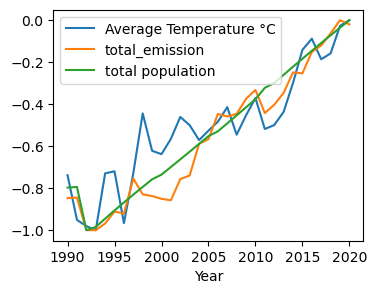

In [33]:
norm_trend.plot(figsize=(4,3))
plt.show()

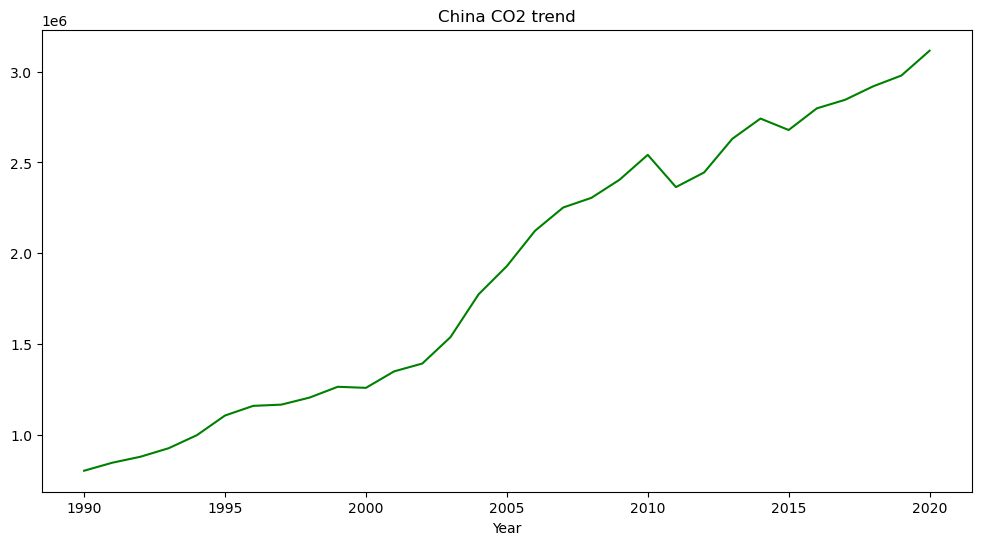

In [35]:
def plot_co2_trend(nation):
    ita = emission_data.loc[emission_data.Area == nation]
    ita = ita.set_index("Year")
    plt.figure(figsize=(12,6))
    ita["total_emission"].plot(kind = "line", color = "green")
    plt.title(f"{nation} CO2 trend")
    plt.show()

plot_co2_trend('China')

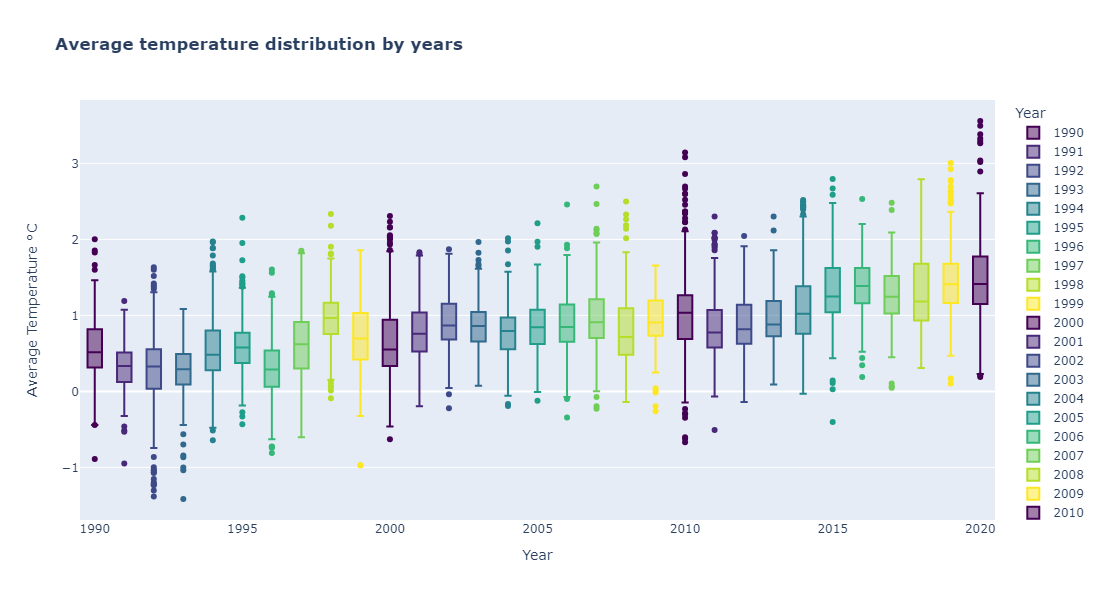

In [47]:
fig = px.box(emission_data, x="Year",
             y="Average Temperature °C",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years'
             #template='plotly_dark'
            )
fig.update_layout(width = 1000, height = 600)
fig.show()

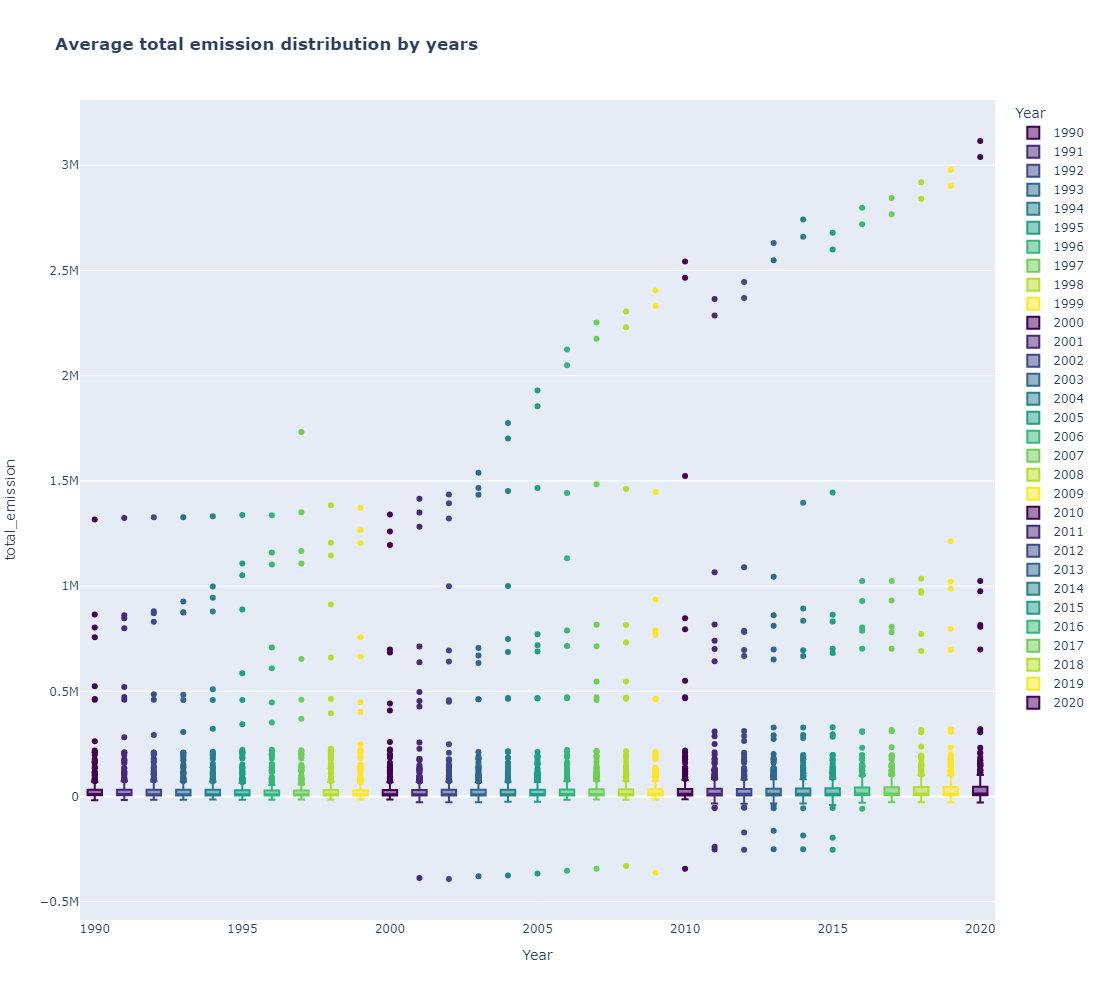

In [49]:
fig = px.box(emission_data, x="Year",
             y="total_emission",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average total emission distribution by years')
fig.update_layout(width = 1000, height = 1000)
fig.show()

In [51]:
continent_mapping =  {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Sudan (former)', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Mayotte', 'Western Sahara', 'Democratic Republic of the Congo', 'Saint Helena, Ascension and Tristan da Cunha', 'United Republic of Tanzania'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of', "Democratic People's Republic of Korea"],
    'Europe': ['Albania','Republic of Moldova', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Belgium-Luxembourg', 'Czechoslovakia', 'Holy See', 'Isle of Man', 'Netherlands (Kingdom of the)', 'Serbia and Montenegro', 'USSR', 'Yugoslav SFR', 'Channel Islands', 'Faroe Islands', 'Gibraltar', 'Liechtenstein', 'United Kingdom of Great Britain and Northern Ireland', 'Russian Federation'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America', 'Anguilla', 'Aruba', 'Bermuda', 'British Virgin Islands', 'Guadeloupe', 'Montserrat', 'Puerto Rico', 'Saint Pierre and Miquelon', 'Turks and Caicos Islands', 'United States Virgin Islands', 'Netherlands Antilles (former)', 'Cayman Islands', 'Greenland', 'Martinique'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'American Samoa', 'French Polynesia', 'Guam', 'New Caledonia', 'Niue', 'Tokelau', 'Wallis and Futuna Islands', 'Pacific Islands Trust Territory', 'Cook Islands', 'Northern Mariana Islands'],
    'South America': ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'Falkland Islands (Malvinas)']
}



#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

emission_data["continent"] = emission_data["Area"].apply(assign_continent)

In [53]:
emission_data[emission_data['continent'].isnull()==True]['Area'].unique()

array([], dtype=object)

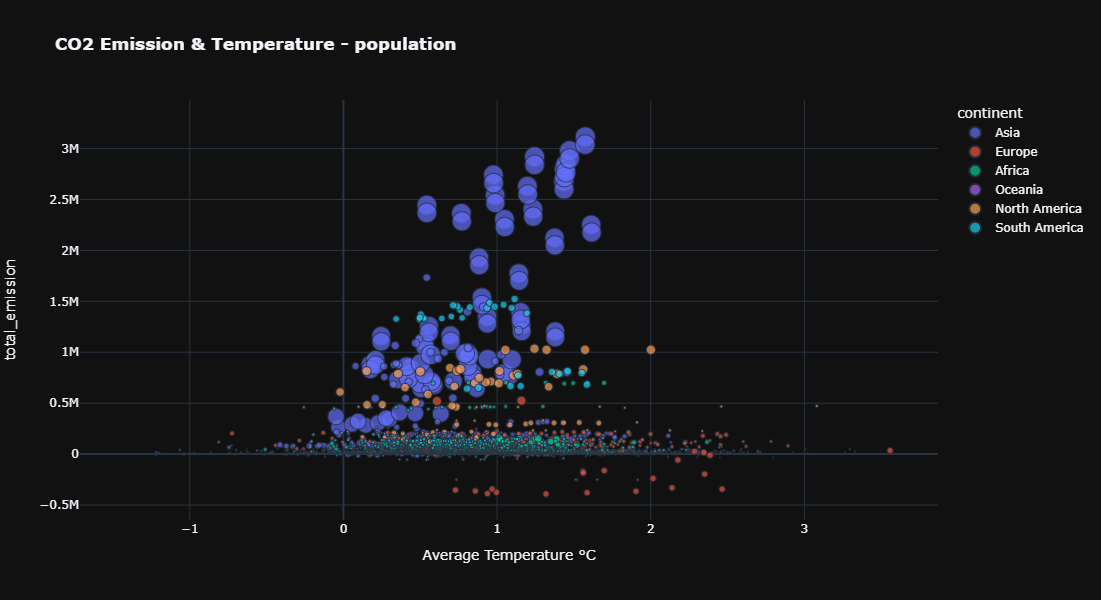

In [65]:
fig = px.scatter(emission_data, emission_data["Average Temperature °C"],
           emission_data["total_emission"], 
           size= "total population", 
           title = "<b>CO2 Emission & Temperature - population", 
           template="plotly_dark", 
           color ="continent")
fig.update_layout(width = 1000, height = 600)
fig.show()

In [89]:
correlation = emission_data.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "total population":"sum"})
correlation.corr()


,total_emission,Average Temperature °C,total population
total_emission,1.000000,0.905520,0.981575
Average Temperature °C,0.905520,1.000000,0.911815
total population,0.981575,0.911815,1.000000


In [108]:
correlation.reset_index().head()

,Year,total_emission,Average Temperature °C,total population
0,1990,1.108960e+07,0.582551,6.462910e+09
1,1991,1.127168e+07,0.317404,6.566375e+09
2,1992,1.116467e+07,0.280593,6.665732e+09
3,1993,1.126050e+07,0.256079,6.761427e+09
4,1994,1.149128e+07,0.593787,6.854377e+09


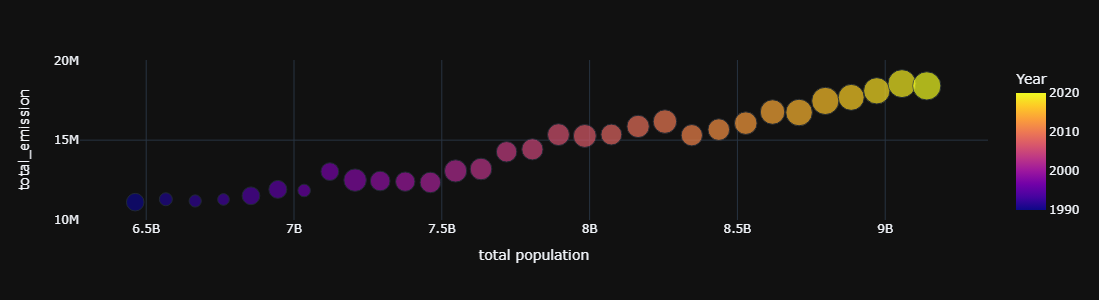

In [109]:
fig = px.scatter(correlation.reset_index(),    
    x = "total population", 
    y = "total_emission", 
    size = "Average Temperature °C",
    color = "Year", 
    template="plotly_dark")
fig.update_layout(width = 800, height = 300)
fig.show()


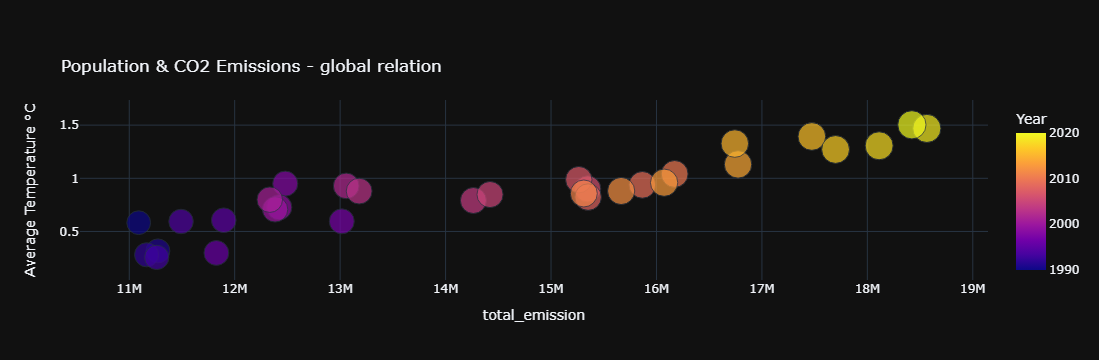

In [97]:
px.scatter(correlation.reset_index(),    
    x = "total_emission", 
    y = "Average Temperature °C", 
    size = "total population",
    color = "Year", 
    title = "<br> Population & CO2 Emissions - global relation",
    template="plotly_dark")

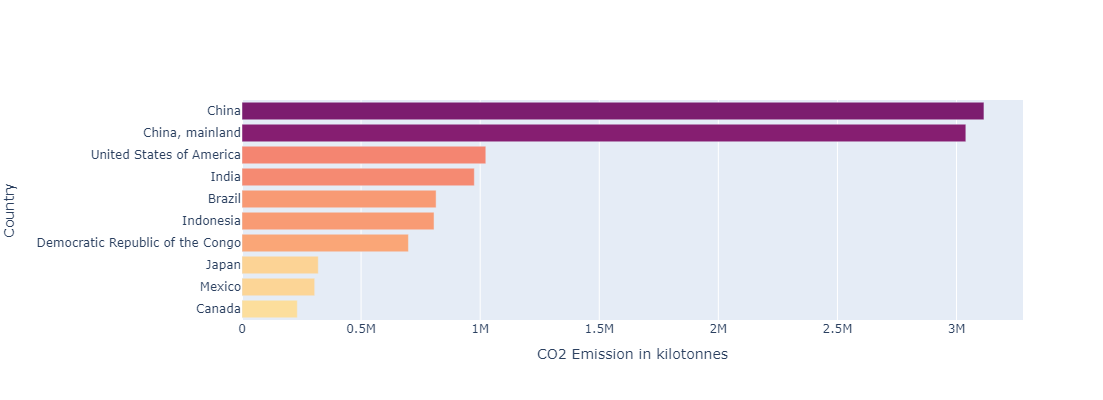

In [135]:
import plotly.express as px


def country_emission(df, year, length=10):
    df = df.copy()
    plot = df.loc[df["Year"] == year]
    plot = plot.sort_values(by="total_emission", ascending=True).tail(length)
    
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=plot['total_emission'],
        y=plot['Area'],
        orientation='h',
        marker=dict(
            color=plot['total_emission'],
            colorscale='sunsetdark'
        )
    ))

    fig.update_layout(
        #title=f'CO2 Emission by top {length} country in {year}',
        xaxis_title='CO2 Emission in kilotonnes',
        yaxis_title='Country',
        yaxis=dict(
            automargin=True
        ),
        height=400
    )

    fig.show()

# Example usage:
# country_emission(emission_data, year=2020)

#'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twili <...> mako', 'mako_r', 'icefire', 'icefire_r', 'vlag', 'vlag_r', 'flare', 'flare_r', 'crest', 'crest_r'
country_emission(emission_data, year=2020)

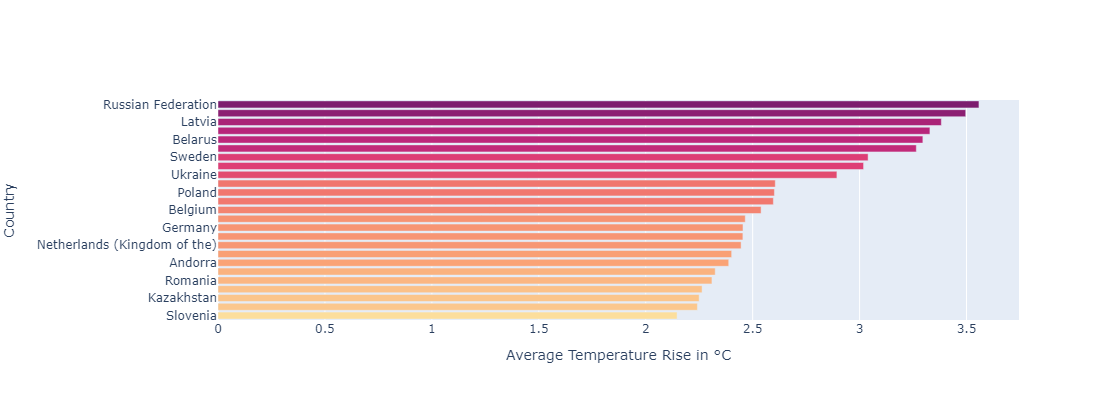

In [121]:
def country_temperature_rise(df, year, length=25):
    df = df.copy()
    plot = df.loc[df["Year"] == year]
    plot = plot.sort_values(by="Average Temperature °C", ascending=True).tail(length)
    
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=plot['Average Temperature °C'],
        y=plot['Area'],
        orientation='h',
        marker=dict(
            color=plot['Average Temperature °C'],
            colorscale='sunsetdark'
        )
    ))

    fig.update_layout(
        #title=f'Impacted countries by CO2 Emission by top {length} country in {year}',
        xaxis_title='Average Temperature Rise in °C ',
        yaxis_title='Country',
        yaxis=dict(
            automargin=True
        ),
        height=400
    )

    fig.show()
country_temperature_rise(emission_data, year=2020)